In [70]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.model_selection import train_test_split
from IPython.display import HTML

np.random.seed(9)

<IPython.core.display.Javascript object>


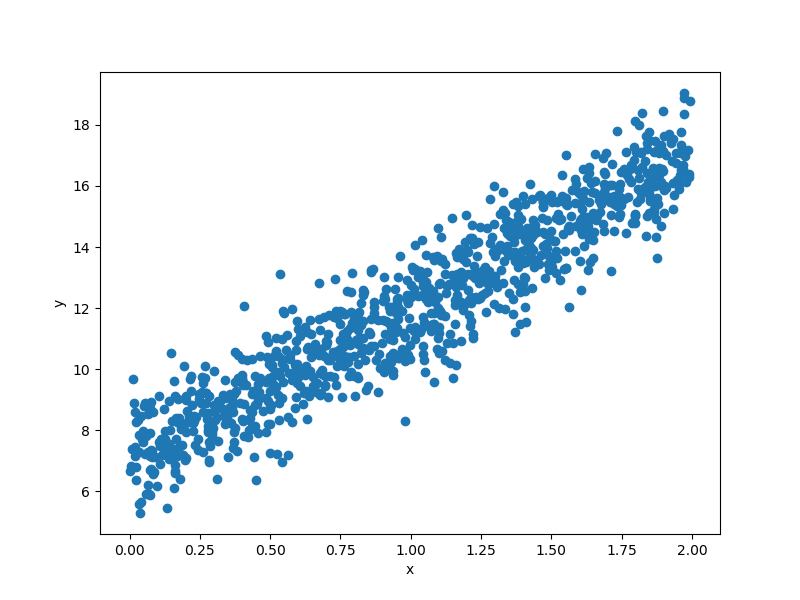

In [71]:
X = 2 * np.random.rand(1000, 1)
y = 7 + 5 * X + np.random.randn(1000, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("X-Train Data,Number of Features: {}".format(X_train.shape))
print("y_train Data,Number of Features: {}".format(y_train.shape))
print("X_test Data,Number of Features: {}".format(X_test.shape))
print("y_test Data,Number of Features: {}".format(y_test.shape))

X-Train Data,Number of Features: (750, 1)
y_train Data,Number of Features: (750, 1)
X_test Data,Number of Features: (250, 1)
y_test Data,Number of Features: (250, 1)


## Gradient Descent

In [79]:
class LinearModel:
    """
    Linear Regression Model Class
    """
    def __init__(self):
        pass

    def gradient_descent(self, X, y, learn_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        self.prev_weights = []
        self.prev_bias = []
        self.X = X
        self.y = y
        costs = []

        for i in range(n_iters):
            """"
            Training Phase
            """
            y_hat = np.dot(X, self.weights) + self.bias
            """
            Cost error Phase
            """
            cost = (1 / n_samples) * np.sum((y_hat - y)**2)
            costs.append(cost)
            """
            Verbose: Description of cost at each iteration
            """
            if i % 200 == 0:
                print("Cost at iteration {0}: {1}".format(i,cost))
            """
            Updating the derivative
            """
            Delta_w = (2 / n_samples) * np.dot(X.T, (y_hat - y))
            Delta_b= (2 / n_samples) * np.sum((y_hat - y)) 
            
            """"
            Updating weights and bias
            """
            self.weights = self.weights - learn_rate * Delta_w
            self.bias = self.bias - learn_rate * Delta_b
            
            """
            Save the weights for visualisation
            """
            self.prev_weights.append(self.weights)
            self.prev_bias.append(self.bias)

        return self.weights, self.bias, costs

    def predict(self, X):
        """
        Predicting the values by using Linear Model
        """
        return np.dot(X, self.weights) + self.bias
    def visualize_training(self):
        """
        Visualizing the line against the dataset        
        """
        
        self.prev_weights = np.array(self.prev_weights)

        x = self.X[:, 0]
        line, = ax.plot(x, x, color='red')
        ax.scatter(x, self.y)

        
        def animate(line_data):
            m, c = line_data
            line.set_ydata(m*x + c)  # update the data
            return line,
        
        def init():
            return line,
        
        def get_next_weight_and_bias():
            for i in range(len(self.prev_weights)):
                yield self.prev_weights[i][0], self.prev_bias[i]
        
        return animation.FuncAnimation(fig, animate, get_next_weight_and_bias, init_func=init,interval=35, blit=True)
        
        
        

In [80]:
model = LinearModel()
w_trained, b_trained, costs = model.gradient_descent(X_train, y_train, learn_rate=0.005, n_iters=1000)

Cost at iteration 0: 154.70520928362635
Cost at iteration 200: 1.4717947517806211
Cost at iteration 400: 1.2882543939248425
Cost at iteration 600: 1.1948334520823034
Cost at iteration 800: 1.1414953838804887


<IPython.core.display.Javascript object>


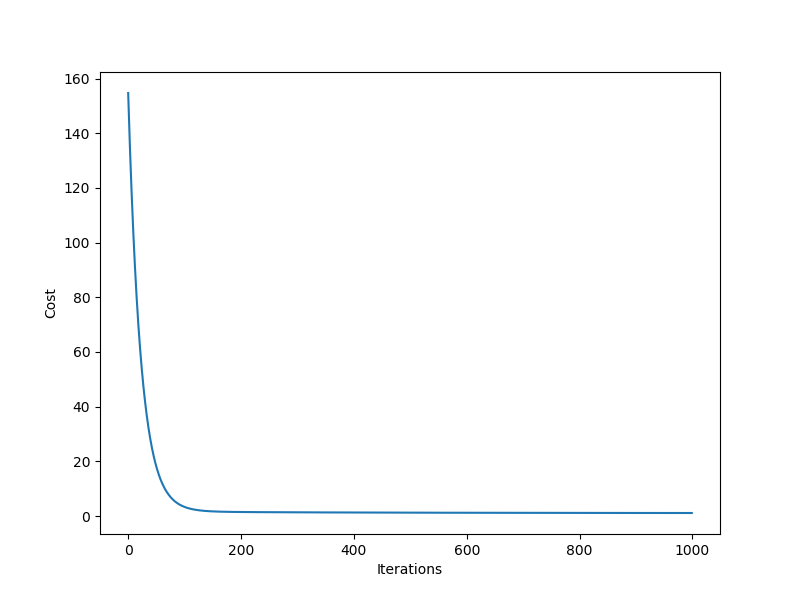

In [81]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(1000), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

<IPython.core.display.Javascript object>


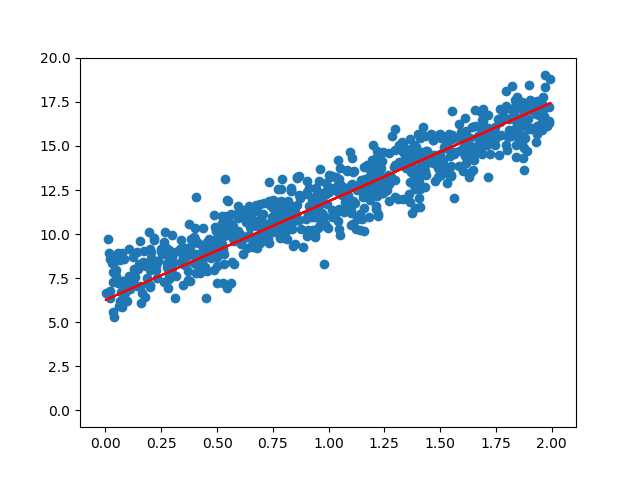

In [82]:
fig, ax = plt.subplots()
ani = model.visualize_training()
plt.show()


In [77]:
n_samples, _= X_train.shape
n_samples_test, _ = X_test.shape

y_p_train = model.predict(X_train)
y_p_test = model.predict(X_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print("Error on training set: {}".format(np.round(error_train, 6)))
print("Error on test set: {}".format(np.round(error_test, 6)))

Error on training set: 1.111042
Error on test set: 0.924575


<IPython.core.display.Javascript object>


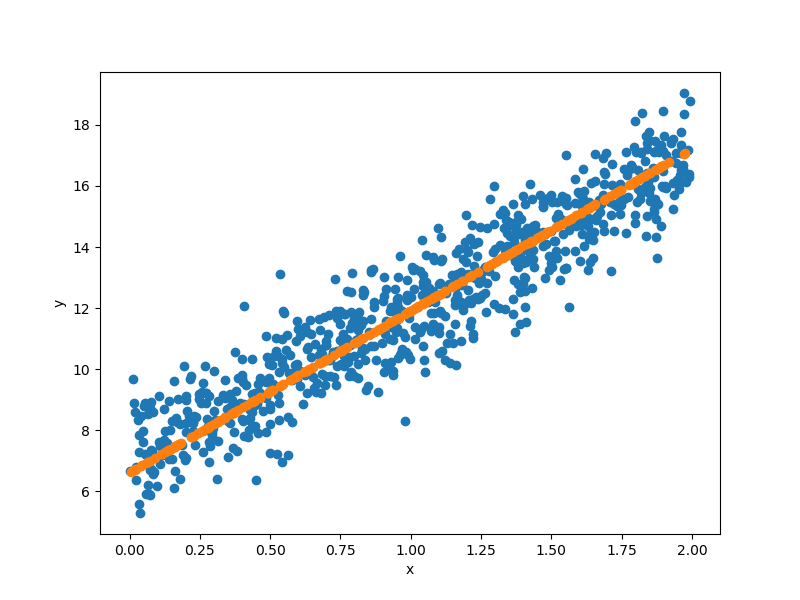

In [20]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Normal Equation

In [10]:
class LinearModel():
    """
    Linear Regression class
    """
    def __init(self):
        pass
    def normal_equation(self, X, y):
        """
        Updating a Linear regression model using normal equation
        """
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0
        
        return self.weights, self.bias
    def predict(self, X):
        """
        Predicting the values by using Linear Model
        """
        return np.dot(X, self.weights) + self.bias


In [11]:
X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

model = LinearModel()
w_trained = model.normal_equation(X_b_train, y_train)

In [12]:
y_p_train = model.predict(X_b_train)
y_p_test = model.predict(X_b_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print("Error on training set: {}".format(np.round(error_train, 6)))
print("Error on test set: {}".format(np.round(error_test, 6)))

Error on training set: 1.070514
Error on test set: 0.905802


<IPython.core.display.Javascript object>


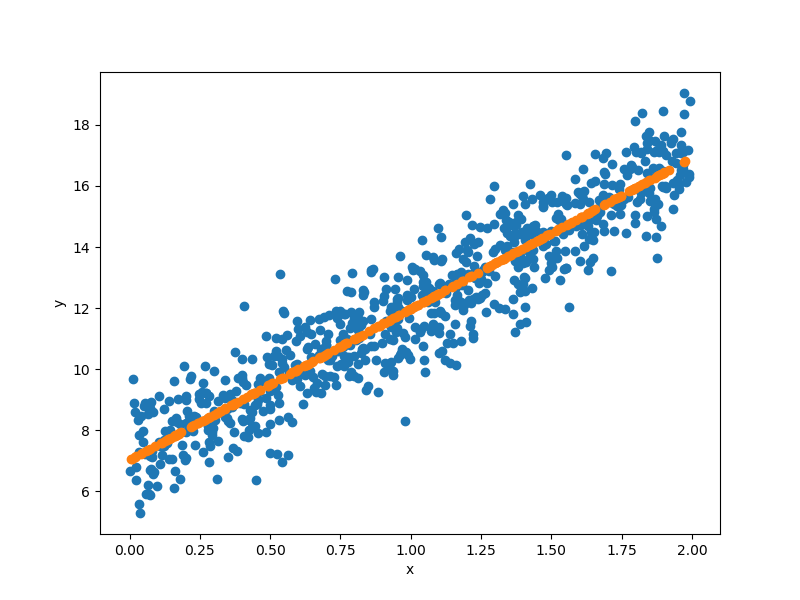

In [13]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("x")
plt.ylabel("y")
plt.show()